KNN can be used for both classification and regression

1st
for 3 nearest neighbor the unknown obj is predicted as star(2 star and one circle)

but for 5 nearest neighbor the unknown obj is predicted as (3 circled and 2 star)

regression 

each * represents  a value
suppose k=3 then value of unknown obj = mean of all 3 nearest values

k= no of nearest neighbors

In [ ]:
How to choose value of K 
1.K must be odd
2.k <= sqrt(n)   ---- n=no of sample
3.k must be multiple of no of categories


In [ ]:
study hr      sleep hr      result
----------------------------------
7              8             p
4              10            f
9              7             p
3              9             f
6              8             p
5              10            f

In [ ]:
find the result of a student with study hour=4 and sleep hour=9
use knn =3

In [ ]:
d1((4-7)**2+(9-8))

In [ ]:
d1= ((4-7)**2 +(9-8)**2)**0.5=3.162
#d2=((4-4)**2 +(9-10)**2)**0.5 =1.0
d3=((4-9)**2 +(9-7)**2)**0.5 =5.3
#d4=((4-3)**2 +(9-9)**2)**0.5=1.0
d5=((4-6)**2 +(9-8)**2)**0.5 =2.23
#d6=((4-5)**2 +(9-10)**2)**0.5=1.411

In [ ]:
d2,d4,d6 are the 3 nearest neighbors from(4,9)
a/c to dataset d2,d4,d6 got fail hence student will be fail

In [ ]:
# when to use knn
data must be simple and small size



In [2]:
import pandas as pd
df=pd.read_csv('C:\\Users\\Sweta\\Desktop\\python\\Data Science\\pima.csv',\
               names=['preg','glucose','bp','skin','insulin','bmi','pedigree','age','result'])
df

,preg,glucose,bp,skin,insulin,bmi,pedigree,age,result
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [3]:
df.shape

(768, 9)

In [5]:
#display how no of people suffering from diabetes or not
df['result'].value_counts()

result
0    500
1    268
Name: count, dtype: int64

<Axes: xlabel='result', ylabel='count'>

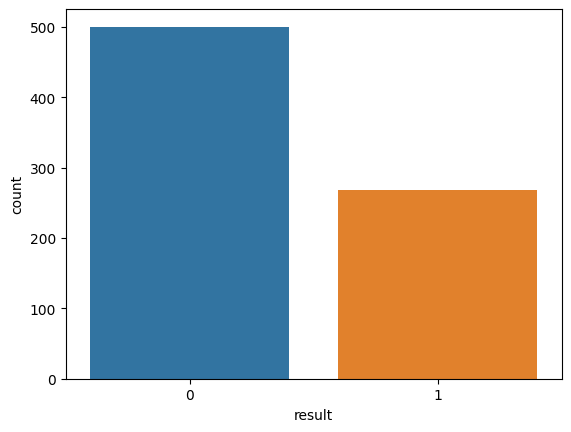

In [6]:
import seaborn as sns
sns.countplot(x=df['result'])

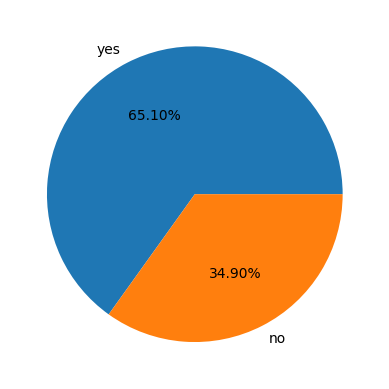

In [8]:
import matplotlib.pyplot as plt
plt.pie(df['result'].value_counts(),labels=['yes','no'],autopct="%0.2f%%")
plt.show()

In [9]:
# handle the missing values
df.isnull().sum()

preg        0
glucose     0
bp          0
skin        0
insulin     0
bmi         0
pedigree    0
age         0
result      0
dtype: int64

In [11]:
#find out 0 values except preg and result
print(len(df.loc[df['glucose']==0]))
print(len(df.loc[df['bp']==0]))
print(len(df.loc[df['skin']==0]))
print(len(df.loc[df['insulin']==0]))
print(len(df.loc[df['bmi']==0]))
print(len(df.loc[df['pedigree']==0]))
print(len(df.loc[df['age']==0]))

5
35
227
374
11
0
0


In [12]:
#  replace the zero values by median value of that column
df['glucose']=df['glucose'].replace(0,df['glucose'].median())
df['bp']=df['bp'].replace(0,df['bp'].median())
df['skin']=df['skin'].replace(0,df['skin'].median())
df['insulin']=df['insulin'].replace(0,df['insulin'].median())
df['bmi']=df['bmi'].replace(0,df['bmi'].median())

In [13]:
#find out 0 values except preg and result
print(len(df.loc[df['glucose']==0]))
print(len(df.loc[df['bp']==0]))
print(len(df.loc[df['skin']==0]))
print(len(df.loc[df['insulin']==0]))
print(len(df.loc[df['bmi']==0]))
print(len(df.loc[df['pedigree']==0]))
print(len(df.loc[df['age']==0]))

0
0
0
0
0
0
0


In [14]:
# separate input and output
X=df.drop(columns=['result'])
Y=df['result']

In [15]:
# Split the dataset for training and testing
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=5)

In [16]:
print("x-train",X_train.shape)
print("y-train",Y_train.shape)

x-train (614, 8)
y-train (614,)


In [18]:
print("x-test",X_test.shape)
print("y-test",Y_test.shape)

x-test (154, 8)
y-test (154,)


In [19]:
# implement KNN 
from sklearn.neighbors import KNeighborsClassifier
K=KNeighborsClassifier(n_neighbors=5)
#train the model
K.fit(X_train,Y_train)
#test the model
Y_pred=K.predict(X_test)
Y_pred

array([0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1,
       0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0,
       0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1],
      dtype=int64)

In [20]:
Y_test

567    0
123    0
615    0
492    0
288    0
      ..
432    0
480    1
7      0
564    0
40     0
Name: result, Length: 154, dtype: int64

In [21]:
# find accuracy
from sklearn.metrics import accuracy_score
acc=accuracy_score(Y_test,Y_pred)
acc=round(acc*100,2)
print(acc)

74.68


In [22]:
#display confusion matrix
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(Y_test,Y_pred)
print(cm)

[[84 16]
 [23 31]]


In [ ]:
   PN PY
AN 84 16

AY 23 31

In [23]:
# lET'S PREDICT FOR UNKNOWN PERSON
data=[[3,130,68,31,0,31.6,0.8,45]]
K.predict(data)

C:\Users\Sweta\AppData\Roaming\Python\Python311\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


array([1], dtype=int64)

0---- no diabete   \

1- diabetes